# _**Part 1: Data Cleaning**_

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path="/content/gdrive/My Drive/ashrae-energy-prediction/"

## **Import Libraries**

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

## **Data Reading**

### Weather_train

In [0]:
Weather_train_df = pd.read_csv(path + 'weather_train.csv')

In [0]:
Weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [0]:
type(Weather_train_df.timestamp[0])

str

In [0]:
Weather_train_df.shape

(139773, 9)

In [0]:
Weather_train_df.site_id.value_counts()

8     8784
0     8784
13    8783
4     8783
2     8783
10    8782
6     8782
9     8780
3     8780
14    8777
1     8763
12    8755
5     8755
11    8614
7     8614
15    8454
Name: site_id, dtype: int64

In [0]:
Weather_train_df['timestamp'][Weather_train_df.site_id==4]

35110    2016-01-01 01:00:00
35111    2016-01-01 02:00:00
35112    2016-01-01 03:00:00
35113    2016-01-01 04:00:00
35114    2016-01-01 05:00:00
                ...         
43888    2016-12-31 19:00:00
43889    2016-12-31 20:00:00
43890    2016-12-31 21:00:00
43891    2016-12-31 22:00:00
43892    2016-12-31 23:00:00
Name: timestamp, Length: 8783, dtype: object

In [0]:
Weather_train_df.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [0]:
Weather_train_df.shape

(139773, 9)

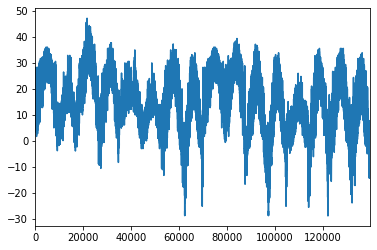

In [0]:
Weather_train_df['air_temperature'].plot()

### Train Data

In [0]:
Train_df = pd.read_csv(path + 'train.csv')

In [0]:
Train_df.tail(20)

,building_id,meter,timestamp,meter_reading
20216080,1434,0,2016-12-31 23:00:00,70.7250
20216081,1434,2,2016-12-31 23:00:00,259.0730
20216082,1435,0,2016-12-31 23:00:00,4.7250
20216083,1436,0,2016-12-31 23:00:00,11.6000
20216084,1436,2,2016-12-31 23:00:00,1274.6600
20216085,1437,0,2016-12-31 23:00:00,195.9250
20216086,1437,2,2016-12-31 23:00:00,1518.9200
20216087,1438,0,2016-12-31 23:00:00,100.6750
20216088,1438,2,2016-12-31 23:00:00,852.7700
20216089,1439,0,2016-12-31 23:00:00,167.4000


In [0]:
Train_df.shape

(20216100, 4)

In [0]:
type(Train_df.timestamp[0]),Train_df.building_id.nunique()

(str, 1449)

In [0]:
# 1449 building

In [0]:
Train_df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [0]:
#train data does not contain missing values???

In [0]:
Train_df.meter.value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


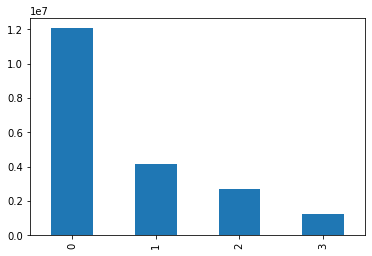

In [0]:
Train_df.meter.value_counts().plot('bar')

#### Visualizing Target variable

In [0]:
Train_df.meter_reading.value_counts()

0.0000       1873976
20.0000        23363
2.9307         23181
36.6000        22154
8.7921         21787
              ...   
72.6357            1
2977.7000          1
55.4186            1
2977.4500          1
15.3563            1
Name: meter_reading, Length: 1688175, dtype: int64

In [0]:
#plt.figure(figsize=(8,6))
#plt.scatter(range(Train_df.shape[0]), np.sort(Train_df['meter_reading'].values))
#plt.xlabel('index', fontsize=12)
#plt.ylabel('meter_reading', fontsize=12)
#plt.title("Target Distribution", fontsize=14)
#plt.show()

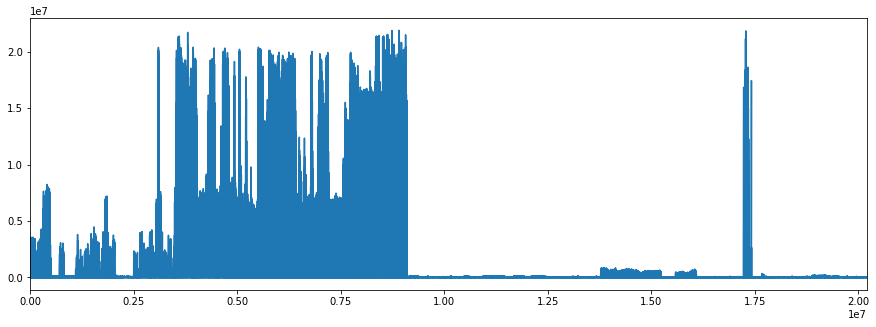

In [0]:
plt.figure(figsize = (15,5))
Train_df['meter_reading'].plot()

#### Visualizing Corrolation between target variable and other variables in Train_df

In [0]:
corrs = Train_df.corr()
corrs

,building_id,meter,meter_reading
building_id,1.000000,0.222268,0.008761
meter,0.222268,1.000000,0.017672
meter_reading,0.008761,0.017672,1.000000


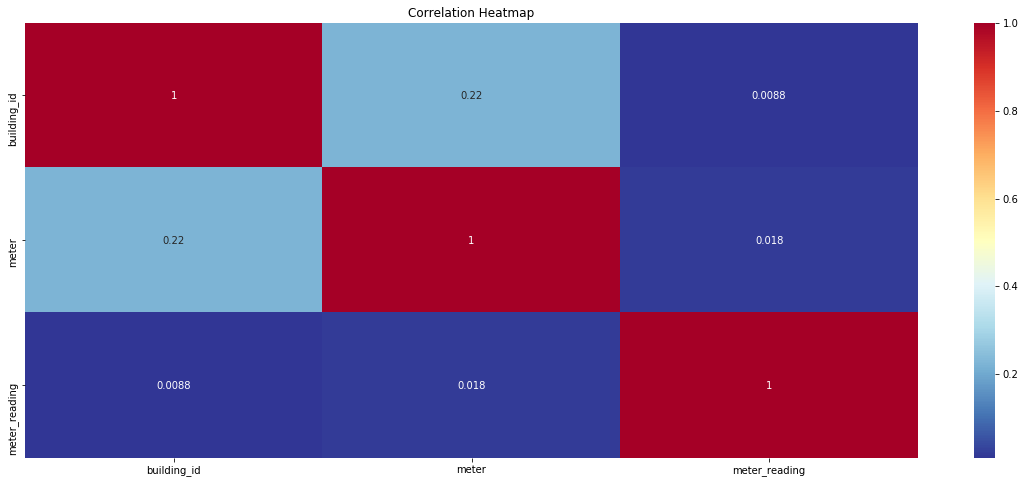

In [0]:
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, #vmin = -0.25, 
            annot = True,
            #vmax = 0.6
            )
plt.title('Correlation Heatmap');

### Building  MetaData

In [0]:
BuildingData_df=pd.read_csv(path+'building_metadata.csv')

In [0]:
BuildingData_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [0]:
BuildingData_df.building_id.nunique()

1449

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


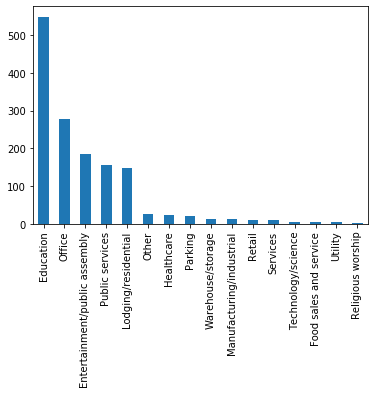

In [0]:
BuildingData_df.primary_use.value_counts().plot('bar')

In [0]:
BuildingData_df.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [0]:
BuildingData_df.shape

(1449, 6)

## **Data Cleaning and dealing with Missing Values** (Train Data)

### Starting with **Building_Data_df**:
we will remove 2 columns 'year_built' and 'floor_count'

In [0]:
del BuildingData_df['floor_count']
del BuildingData_df['year_built']

In [0]:
BuildingData_df.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607


### Dealing with **Weather_train_df**

#### Removing the following columns
because they contains too much missing values:
*   cloud_coverage     ===>   69173
*   precip_depth_1_hr  ===>   50289
*   sea_level_pressure ===>   10618
*   wind_direction     ===>    6268      

In [0]:
del Weather_train_df['cloud_coverage']
del Weather_train_df['precip_depth_1_hr']
del Weather_train_df['sea_level_pressure']
del Weather_train_df['wind_direction']

In [0]:
Weather_train_df.head()

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,25.0,20.0,0.0
1,0,2016-01-01 01:00:00,24.4,21.1,1.5
2,0,2016-01-01 02:00:00,22.8,21.1,0.0
3,0,2016-01-01 03:00:00,21.1,20.6,0.0
4,0,2016-01-01 04:00:00,20.0,20.0,2.6


In [0]:
Weather_train_df.isnull().sum()

site_id              0
timestamp            0
air_temperature     55
dew_temperature    113
wind_speed         304
dtype: int64

In [0]:
Weather_train_df.describe()

,site_id,air_temperature,dew_temperature,wind_speed
count,139773.000000,139718.000000,139660.000000,139469.000000
mean,7.478977,14.418106,7.350158,3.560527
std,4.604744,10.626595,9.790235,2.335874
min,0.000000,-28.900000,-35.000000,0.000000
25%,3.000000,7.200000,0.600000,2.100000
50%,7.000000,15.000000,8.300000,3.100000
75%,11.000000,22.200000,14.400000,5.000000
max,15.000000,47.200000,26.100000,19.000000


#### Replacing missing values 
in 'air_temperature',  'dew_temperature',  'wind_speed' with mean value of each columns

In [0]:
M_air=np.mean(Weather_train_df['air_temperature'])
M_dew=np.mean(Weather_train_df['dew_temperature'])
M_wind=np.mean(Weather_train_df['wind_speed'])

In [0]:
Weather_train_df['air_temperature']=Weather_train_df['air_temperature'].fillna(M_air)
Weather_train_df['dew_temperature']=Weather_train_df['dew_temperature'].fillna(M_dew)
Weather_train_df['wind_speed']=Weather_train_df['wind_speed'].fillna(M_wind)

In [0]:
Weather_train_df.isnull().sum()

site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

## **Handeling some data type**

In [0]:
pd.to_datetime(Train_df['timestamp'])

0          2016-01-01 00:00:00
1          2016-01-01 00:00:00
2          2016-01-01 00:00:00
3          2016-01-01 00:00:00
4          2016-01-01 00:00:00
                   ...        
20216095   2016-12-31 23:00:00
20216096   2016-12-31 23:00:00
20216097   2016-12-31 23:00:00
20216098   2016-12-31 23:00:00
20216099   2016-12-31 23:00:00
Name: timestamp, Length: 20216100, dtype: datetime64[ns]

In [0]:
pd.to_datetime(Weather_train_df['timestamp'])

0        2016-01-01 00:00:00
1        2016-01-01 01:00:00
2        2016-01-01 02:00:00
3        2016-01-01 03:00:00
4        2016-01-01 04:00:00
                 ...        
139768   2016-12-31 19:00:00
139769   2016-12-31 20:00:00
139770   2016-12-31 21:00:00
139771   2016-12-31 22:00:00
139772   2016-12-31 23:00:00
Name: timestamp, Length: 139773, dtype: datetime64[ns]

In [0]:
type(BuildingData_df['primary_use'][0])

str

In [0]:
Train_df['timestamp'] = pd.to_datetime(Train_df['timestamp'])
Weather_train_df['timestamp'] = pd.to_datetime(Weather_train_df['timestamp'])
#BuildingData_df['primary_use'] = BuildingData_df['primary_use'].astype('category')

In [0]:
BuildingData_df['primary_use'] 

0                           Education
1                           Education
2                           Education
3                           Education
4                           Education
                    ...              
1444    Entertainment/public assembly
1445                        Education
1446    Entertainment/public assembly
1447              Lodging/residential
1448                           Office
Name: primary_use, Length: 1449, dtype: object

## **Ploting some data distribution**

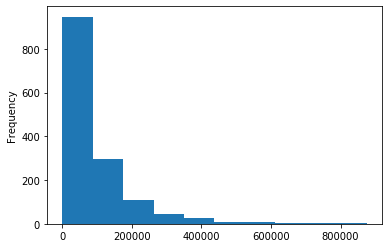

In [0]:
BuildingData_df['square_feet'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


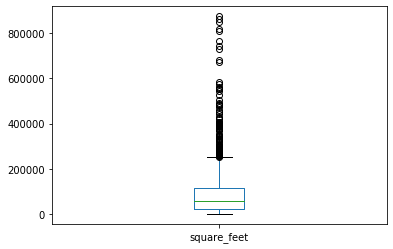

In [0]:
BuildingData_df['square_feet'].plot('box')


## **Merge the 3 data frame together into Train_df**

In [0]:
temp_df = Train_df[['building_id']]
temp_df = temp_df.merge(BuildingData_df, on=['building_id'], how='left')
del temp_df['building_id']
Train_df = pd.concat([Train_df, temp_df], axis=1)

In [0]:
Train_df

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607
...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775


In [0]:
del temp_df

In [0]:
temp_df = Train_df[['site_id','timestamp']]
temp_df = temp_df.merge(Weather_train_df, on=['site_id','timestamp'], how='left')
del temp_df['site_id'], temp_df['timestamp']
Train_df = pd.concat([Train_df, temp_df], axis=1)

In [0]:
del temp_df

In [0]:
Train_df

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,25.0,20.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,25.0,20.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,25.0,20.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,25.0,20.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,25.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1.7,-5.6,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,1.7,-5.6,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1.7,-5.6,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,1.7,-5.6,8.8


In [0]:
Train_df.isnull().sum()

building_id            0
meter                  0
timestamp              0
meter_reading          0
site_id                0
primary_use            0
square_feet            0
air_temperature    90495
dew_temperature    90495
wind_speed         90495
dtype: int64

## **Apply Label Encoding method on primary_use variable**

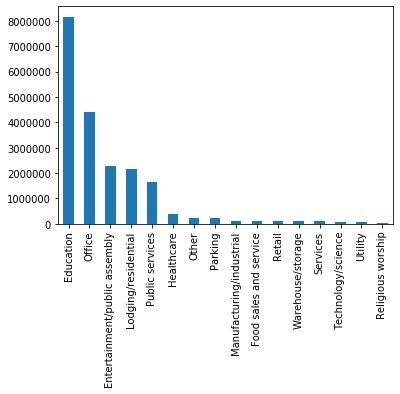

In [0]:
Train_df.primary_use.value_counts().plot.bar()

In [0]:
idx = Train_df.primary_use.isin(['Parking','Manufacturing/industrial','Food sales and service','Retail','Warehouse/storage','Services','Technology/science','Utility','Religious worship'])
Train_df.primary_use[idx] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


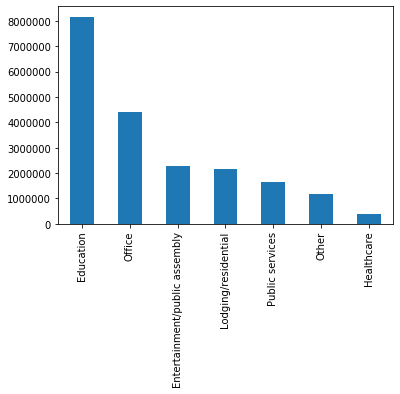

In [0]:
Train_df.primary_use.value_counts().plot.bar()

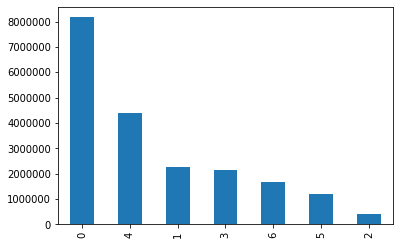

In [0]:
label_encoder = LabelEncoder()
Train_df['primary_use']=label_encoder.fit_transform(Train_df.primary_use).astype(np.int8)
Train_df.primary_use.value_counts().plot.bar()
#integer_encoded = label_encoder.fit_transform(Train_df.primary_use)
#print(integer_encoded)

In [0]:
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#onehot_encoded

## **Dealing with missing values after merge in all train data**

In [0]:
print(Train_df.dew_temperature.median())
print(Train_df.air_temperature.median())
print(Train_df.wind_speed.median())

8.9
16.7
3.1


In [0]:
Train_df['dew_temperature']=Train_df['dew_temperature'].fillna(Train_df.dew_temperature.median())
Train_df['air_temperature']=Train_df['dew_temperature'].fillna(Train_df.air_temperature.median())
Train_df['wind_speed']=Train_df['wind_speed'].fillna(Train_df.wind_speed.median())


In [0]:
Train_df.isnull().sum()

building_id        0
meter              0
timestamp          0
meter_reading      0
site_id            0
primary_use        0
square_feet        0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

## **Dealing with skewed variables**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


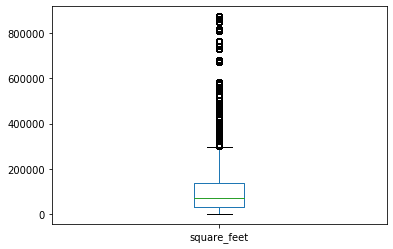

In [0]:
Train_df.square_feet.plot('box')

In [0]:
Train_df['square_feet']=Train_df['square_feet'].map(np.log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


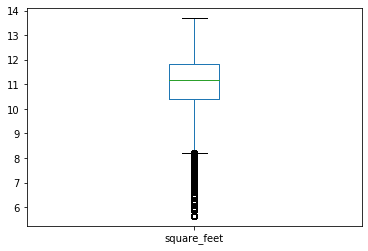

In [0]:
Train_df.square_feet.plot('box')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


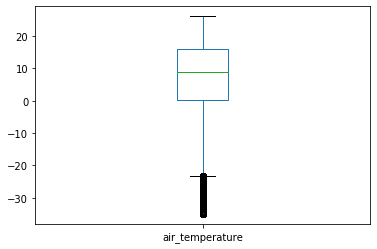

In [0]:
Train_df.air_temperature.plot('box')

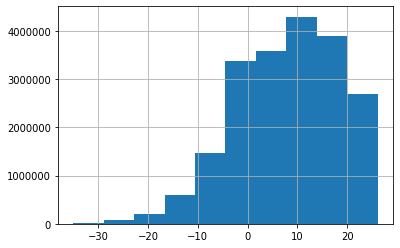

In [0]:
Train_df.air_temperature.hist()

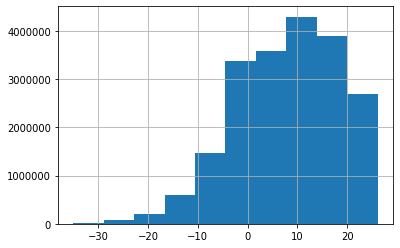

In [0]:
Train_df.dew_temperature.hist()

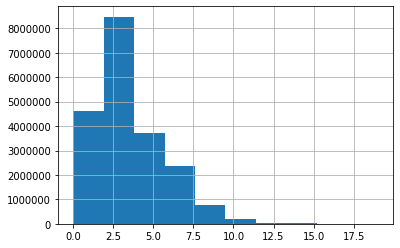

In [0]:
Train_df.wind_speed.hist()

After Visualisation we gonna apply MinMaxScaler written by myself

In [0]:
max_air=Train_df.air_temperature.max()
min_air=Train_df.air_temperature.min()
max_dew=Train_df.dew_temperature.max()
min_dew=Train_df.dew_temperature.min()
max_wind=Train_df.wind_speed.max()
min_wind=Train_df.wind_speed.min()

In [0]:
def min_max_air_normalization(x):
  return ((x-min_air)/(max_air-min_air))
def min_max_dew_normalization(x):
  return ((x-min_dew)/(max_dew-min_dew))
def min_max_wind_normalization(x):
  return ((x-min_wind)/(max_wind-min_wind))

In [0]:
Train_df['air_temperature']=Train_df['air_temperature'].map(min_max_air_normalization)
Train_df['dew_temperature']=Train_df['dew_temperature'].map(min_max_dew_normalization)
Train_df['wind_speed']=Train_df['wind_speed'].map(min_max_wind_normalization)

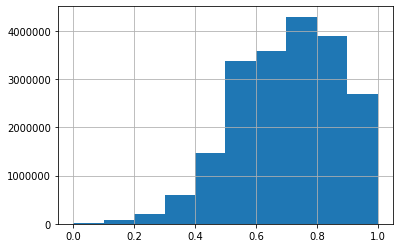

In [0]:
Train_df.air_temperature.hist()

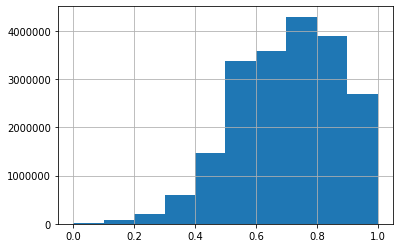

In [0]:
Train_df.dew_temperature.hist()

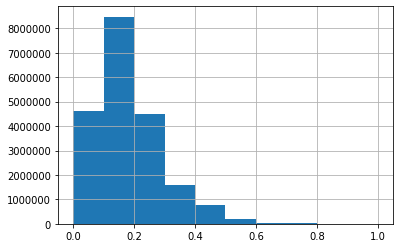

In [0]:
Train_df.wind_speed.hist()

## **Preparing Test Data**
We gonna apply the same previous steps to test data

### Data reading

In [0]:
Test_df=pd.read_csv(path+'test.csv')
Weather_test_df=pd.read_csv(path+'weather_test.csv')

In [0]:
Test_df.shape, Weather_test_df.shape

((41697600, 4), (277243, 9))

In [0]:
Test_df.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [0]:
Weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


### Missing Values

In [0]:
Weather_test_df.isnull().sum()

site_id                    0
timestamp                  0
air_temperature          104
cloud_coverage        140448
dew_temperature          327
precip_depth_1_hr      95588
sea_level_pressure     21265
wind_direction         12370
wind_speed               460
dtype: int64

In [0]:
del Weather_test_df['cloud_coverage']
del Weather_test_df['precip_depth_1_hr']
del Weather_test_df['sea_level_pressure']
del Weather_test_df['wind_direction']

In [0]:
Weather_test_df.head()

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,2017-01-01 00:00:00,17.8,11.7,3.6
1,0,2017-01-01 01:00:00,17.8,12.8,3.1
2,0,2017-01-01 02:00:00,16.1,12.8,3.1
3,0,2017-01-01 03:00:00,17.2,13.3,3.1
4,0,2017-01-01 04:00:00,16.7,13.3,2.6


In [0]:
Weather_test_df.describe()

,site_id,air_temperature,dew_temperature,wind_speed
count,277243.000000,277139.000000,276916.000000,276783.000000
mean,7.484654,14.276863,7.487658,3.548873
std,4.616959,10.741605,10.153973,2.317184
min,0.000000,-28.100000,-31.600000,0.000000
25%,3.000000,7.200000,0.600000,2.100000
50%,7.000000,15.000000,8.400000,3.100000
75%,12.000000,22.200000,15.000000,4.600000
max,15.000000,48.300000,26.700000,24.200000


In [0]:
M_air_test=np.mean(Weather_test_df['air_temperature'])
M_dew_test=np.mean(Weather_test_df['dew_temperature'])
M_wind_test=np.mean(Weather_test_df['wind_speed'])

In [0]:
Weather_test_df['air_temperature']=Weather_test_df['air_temperature'].fillna(M_air_test)
Weather_test_df['dew_temperature']=Weather_test_df['dew_temperature'].fillna(M_dew_test)
Weather_test_df['wind_speed']=Weather_test_df['wind_speed'].fillna(M_wind_test)

In [0]:
Weather_test_df.isnull().sum()

site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

In [0]:
Test_df['timestamp'] = pd.to_datetime(Test_df['timestamp'])
Weather_test_df['timestamp'] = pd.to_datetime(Weather_test_df['timestamp'])

### Merge

In [0]:
temp_df = Test_df[['building_id']]
temp_df = temp_df.merge(BuildingData_df, on=['building_id'], how='left')
del temp_df['building_id']
Test_df = pd.concat([Test_df, temp_df], axis=1)

In [0]:
Test_df

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet
0,0,0,0,2017-01-01 00:00:00,0,Education,7432
1,1,1,0,2017-01-01 00:00:00,0,Education,2720
2,2,2,0,2017-01-01 00:00:00,0,Education,5376
3,3,3,0,2017-01-01 00:00:00,0,Education,23685
4,4,4,0,2017-01-01 00:00:00,0,Education,116607
...,...,...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,15,Entertainment/public assembly,19619
41697596,41697596,1445,0,2018-05-09 07:00:00,15,Education,4298
41697597,41697597,1446,0,2018-05-09 07:00:00,15,Entertainment/public assembly,11265
41697598,41697598,1447,0,2018-05-09 07:00:00,15,Lodging/residential,29775


In [0]:
del temp_df

In [0]:
temp_df = Test_df[['site_id','timestamp']]
temp_df = temp_df.merge(Weather_test_df, on=['site_id','timestamp'], how='left')
del temp_df['site_id'], temp_df['timestamp']
Test_df = pd.concat([Test_df, temp_df], axis=1)
del temp_df
Test_df

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,17.8,11.7,3.6
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,17.8,11.7,3.6
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,17.8,11.7,3.6
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,17.8,11.7,3.6
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,17.8,11.7,3.6
...,...,...,...,...,...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,15,Entertainment/public assembly,19619,NaN,NaN,NaN
41697596,41697596,1445,0,2018-05-09 07:00:00,15,Education,4298,NaN,NaN,NaN
41697597,41697597,1446,0,2018-05-09 07:00:00,15,Entertainment/public assembly,11265,NaN,NaN,NaN
41697598,41697598,1447,0,2018-05-09 07:00:00,15,Lodging/residential,29775,NaN,NaN,NaN


### Missing Values after merge

In [0]:
Test_df.isnull().sum()

row_id                  0
building_id             0
meter                   0
timestamp               0
site_id                 0
primary_use             0
square_feet             0
air_temperature    199029
dew_temperature    199029
wind_speed         199029
dtype: int64

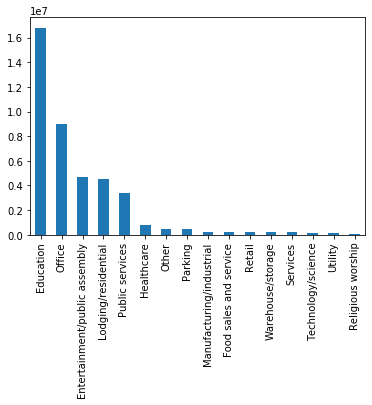

In [0]:
Test_df.primary_use.value_counts().plot.bar()

In [0]:
idx_test = Test_df.primary_use.isin(['Parking','Manufacturing/industrial','Food sales and service','Retail','Warehouse/storage','Services','Technology/science','Utility','Religious worship'])
Test_df.primary_use[idx_test] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


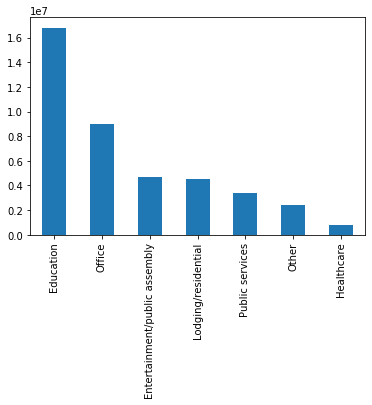

In [0]:
Test_df.primary_use.value_counts().plot.bar()

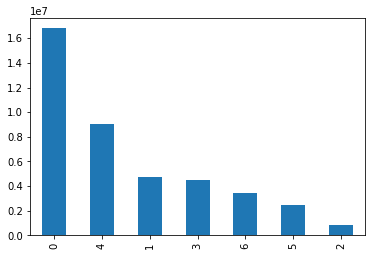

In [0]:
Test_df['primary_use']=label_encoder.fit_transform(Test_df.primary_use).astype(np.int8)
Test_df.primary_use.value_counts().plot.bar()

In [0]:
Test_df['dew_temperature']=Test_df['dew_temperature'].fillna(Test_df.dew_temperature.median())
Test_df['air_temperature']=Test_df['dew_temperature'].fillna(Test_df.air_temperature.median())
Test_df['wind_speed']=Test_df['wind_speed'].fillna(Test_df.wind_speed.median())


In [0]:
Test_df.isnull().sum()

row_id             0
building_id        0
meter              0
timestamp          0
site_id            0
primary_use        0
square_feet        0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

### Skewed Variables

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


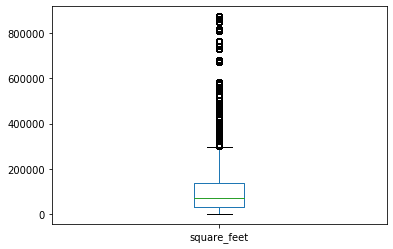

In [0]:
Test_df.square_feet.plot('box')

In [0]:
Test_df['square_feet']=Test_df['square_feet'].map(np.log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


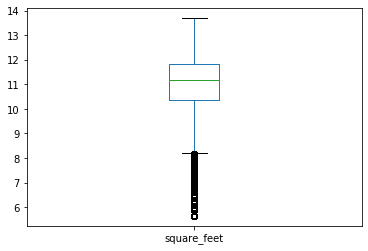

In [0]:
Test_df.square_feet.plot('box')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


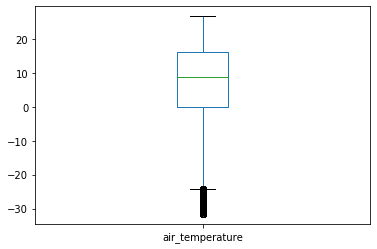

In [0]:
Test_df.air_temperature.plot('box')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


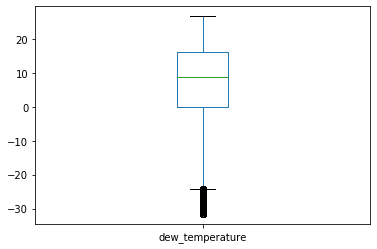

In [0]:
Test_df.dew_temperature.plot('box')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


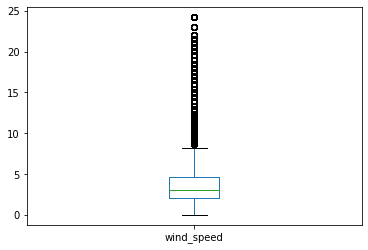

In [0]:
Test_df.wind_speed.plot('box')

In [0]:
max_air=Test_df.air_temperature.max()
min_air=Test_df.air_temperature.min()
max_dew=Test_df.dew_temperature.max()
min_dew=Test_df.dew_temperature.min()
max_wind=Test_df.wind_speed.max()
min_wind=Test_df.wind_speed.min()

In [0]:
Test_df['air_temperature']=Test_df['air_temperature'].map(min_max_air_normalization)
Test_df['dew_temperature']=Test_df['dew_temperature'].map(min_max_dew_normalization)
Test_df['wind_speed']=Test_df['wind_speed'].map(min_max_wind_normalization)

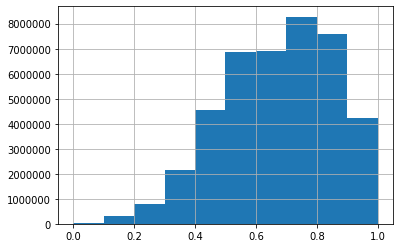

In [0]:
Test_df.air_temperature.hist()

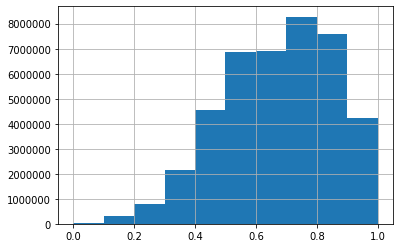

In [0]:
Test_df.dew_temperature.hist()

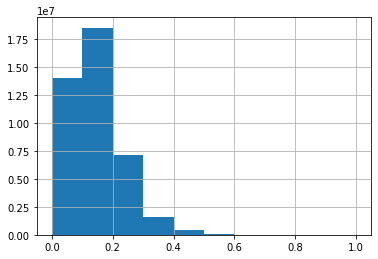

In [0]:
Test_df.wind_speed.hist()

## **Saving preprocced data to use it in Pat2**

In [0]:
Train_df.to_csv(path+'train_data.csv',index=False)
Test_df.to_csv(path+'test_data.csv',index=False)

# _**Part 2: Modeling**_

## **Imports**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten , GRU , LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 

Using TensorFlow backend.


## **Loading train data**

In [0]:
train=pd.read_csv(path+'train_data.csv')

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,0,8.913550,0.900164,0.900164,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,0,7.908387,0.900164,0.900164,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,0,8.589700,0.900164,0.900164,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,0,10.072597,0.900164,0.900164,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,0,11.666565,0.900164,0.900164,0.0


### Delete 'building_id' and 'site_id' from Train data

In [0]:
del train['building_id'] 
del train['site_id']

In [0]:
train.head()

,meter,timestamp,meter_reading,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,0.0,0,8.913550,0.900164,0.900164,0.0
1,0,2016-01-01 00:00:00,0.0,0,7.908387,0.900164,0.900164,0.0
2,0,2016-01-01 00:00:00,0.0,0,8.589700,0.900164,0.900164,0.0
3,0,2016-01-01 00:00:00,0.0,0,10.072597,0.900164,0.900164,0.0
4,0,2016-01-01 00:00:00,0.0,0,11.666565,0.900164,0.900164,0.0


In [0]:
train['timestamp']=pd.to_datetime(train['timestamp'])

In [0]:
train=train.sort_values(by=['timestamp'])

### Apply log normalization to target variable

In [0]:
target=train['meter_reading'].apply(lambda x: np.log(x+1))

In [0]:
target

0           0.000000
1543        0.000000
1542        4.965226
1541        3.791459
1540        8.081902
              ...   
20214523    1.246314
20214524    2.737771
20214525    3.899394
20214509    0.810930
20216099    1.348073
Name: meter_reading, Length: 20216100, dtype: float64

### Split data into train and test

In [0]:
X=train[['meter',	'primary_use'	,'square_feet',	'air_temperature',	'dew_temperature',	'wind_speed']]

In [0]:
X.head()

,meter,primary_use,square_feet,air_temperature,dew_temperature,wind_speed
0,0,0,8.913550,0.900164,0.900164,0.000000
1543,1,6,12.204682,0.373159,0.373159,0.215789
1542,0,6,12.204682,0.373159,0.373159,0.215789
1541,0,5,10.081759,0.373159,0.373159,0.215789
1540,2,4,11.375811,0.373159,0.373159,0.215789


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size = 0.3, random_state=0)

## **Exploring different Models**

### 5 Dense layers model

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [0]:
%%time
history=NN_model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=50, batch_size=64000,shuffle=True)





Train on 14151270 samples, validate on 6064830 samples
Epoch 1/50





14151270/14151270 [==============================] - 22s 2us/step - loss: 1.5261 - acc: 0.0012 - val_loss: 1.3286 - val_acc: 3.2317e-05
Epoch 2/50
14151270/14151270 [==============================] - 12s 1us/step - loss: 1.2816 - acc: 1.0621e-04 - val_loss: 1.2552 - val_acc: 6.9911e-05
Epoch 3/50
14151270/14151270 [==============================] - 13s 1us/step - loss: 1.2404 - acc: 1.7165e-04 - val_loss: 1.2254 - val_acc: 1.9390e-04
Epoch 4/50
14151270/14151270 [==============================] - 12s 1us/step - loss: 1.2240 - acc: 1.9673e-04 - val_loss: 1.2302 - val_acc: 1.0058e-04
Epoch 5/50
14151270/14151270 [==============================] - 12s 1us/step - loss: 1.2148 - acc: 2.2938e-04 - val_loss: 1.2110 - val_acc: 3.7759e-04
Epoch 6/50
14151270/14151270 [==============================] - 12s 1us/step - loss: 1.2069 - acc: 3.2534e-04 - val_loss: 1.2166 - val_acc: 1.1987e-04
Epoch 7/50
14151270/14151270 [=====

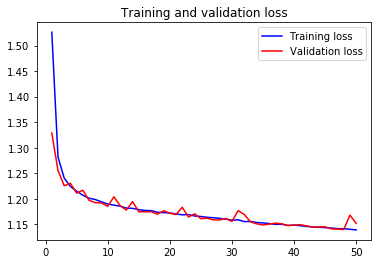

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

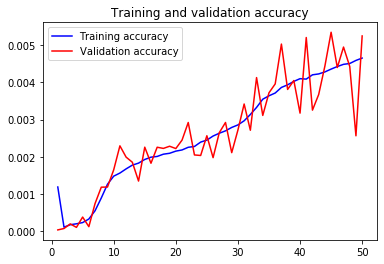

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### 3 Dense layers model

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [0]:
hist = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=50, batch_size=6400)

Train on 14151270 samples, validate on 6064830 samples
Epoch 1/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.4113 - acc: 2.6492e-04 - val_loss: 3.4073 - val_acc: 2.9267e-04
Epoch 2/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.4075 - acc: 2.6824e-04 - val_loss: 3.4075 - val_acc: 3.1839e-04
Epoch 3/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.4049 - acc: 2.5969e-04 - val_loss: 3.4004 - val_acc: 2.5063e-04
Epoch 4/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.4031 - acc: 2.3708e-04 - val_loss: 3.3992 - val_acc: 2.1682e-04
Epoch 5/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.4020 - acc: 2.0804e-04 - val_loss: 3.3998 - val_acc: 2.1320e-04
Epoch 6/50
14151270/14151270 [==============================] - 14s 1us/step - loss: 3.3977 - acc: 1.5285e-04 - val_loss: 3.3814 - val_acc: 8.4751e-05
Epoch 7/50
14151270/14151270 [=========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


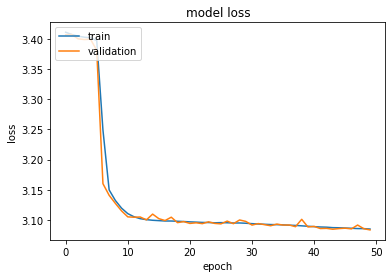

In [0]:
print(hist.history.keys())
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

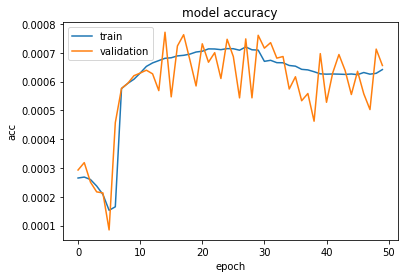

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### GRU model

In [0]:
x_train=X_train.to_numpy()
y_train=Y_train.to_numpy()
x_test=X_test.to_numpy()
y_test=Y_test.to_numpy()

In [0]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[-1],1))
y_train=y_train.reshape((y_train.shape[0],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[-1],1))
y_test=y_test.reshape((y_test.shape[0],1))


In [0]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((14151270, 6, 1), (14151270, 1), (6064830, 6, 1), (6064830, 1))

In [0]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [0]:
model = Sequential()
model.add(GRU(32, 
               input_shape=( x_train.shape[1],1), 
               dropout=0.2,
               recurrent_dropout= 0.2
              ))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3264      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________


In [0]:

history = model.fit(x_train,y_train,
                              epochs=20, 
                              validation_data = (x_test,y_test), 
                              #steps_per_epoch=500,
                              batch_size=6000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14151270 samples, validate on 6064830 samples
Epoch 1/20





14151270/14151270 [==============================] - 59s 4us/step - loss: 4.4745 - acc: 4.8907e-04 - val_loss: 6.8441 - val_acc: 0.0000e+00
Epoch 2/20
14151270/14151270 [==============================] - 48s 3us/step - loss: 3.8075 - acc: 2.8337e-05 - val_loss: 7.0284 - val_acc: 7.3786e-04
Epoch 3/20
14151270/14151270 [==============================] - 49s 3us/step - loss: 3.6898 - acc: 4.4943e-05 - val_loss: 7.4259 - val_acc: 0.0012
Epoch 4/20
14151270/14151270 [==============================] - 48s 3us/step - loss: 3.5358 - acc: 1.0126e-04 - val_loss: 7.1570 - val_acc: 0.0045
Epoch 5/20
14151270/14151270 [==============================] - 48s 3us/step - loss: 3.3554 - acc: 1.4500e-04 - val_loss: 7.4272 - val_acc: 0.0078
Epoch 6/20
14151270/14151270 [==============================] - 48s 3us/step - loss: 3.3131 - acc: 1

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


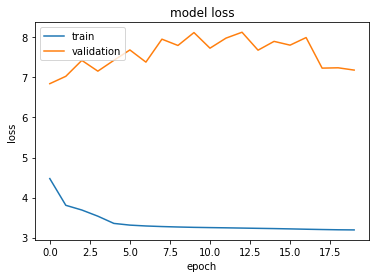

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

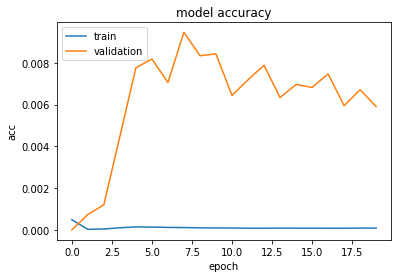

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### LSTM Model

In [0]:
x_train=X_train.to_numpy()
y_train=Y_train.to_numpy()
x_test=X_test.to_numpy()
y_test=Y_test.to_numpy()

In [0]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[-1],1))
y_train=y_train.reshape((y_train.shape[0],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[-1],1))
y_test=y_test.reshape((y_test.shape[0],1))


In [0]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((14151270, 6, 1), (14151270, 1), (6064830, 6, 1), (6064830, 1))

In [0]:
model = Sequential()
model.add(LSTM(32, 
               input_shape=( x_train.shape[1],1), 
               dropout=0.2,
               recurrent_dropout= 0.2
              ))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse',metrics=['mse'])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [0]:

history = model.fit(x_train,y_train,
                              epochs=25, 
                              validation_data = (x_test,y_test), 
                              #steps_per_epoch=500,
                              batch_size=6000)

Train on 14151270 samples, validate on 6064830 samples
Epoch 1/25
14151270/14151270 [==============================] - 56s 4us/step - loss: 4.3374 - mean_squared_error: 4.3374 - val_loss: 6.6076 - val_mean_squared_error: 6.6076
Epoch 2/25
14151270/14151270 [==============================] - 55s 4us/step - loss: 3.8994 - mean_squared_error: 3.8994 - val_loss: 7.5852 - val_mean_squared_error: 7.5852
Epoch 3/25
14151270/14151270 [==============================] - 54s 4us/step - loss: 3.8165 - mean_squared_error: 3.8165 - val_loss: 6.8164 - val_mean_squared_error: 6.8164
Epoch 4/25
14151270/14151270 [==============================] - 55s 4us/step - loss: 3.6723 - mean_squared_error: 3.6723 - val_loss: 7.2114 - val_mean_squared_error: 7.2114
Epoch 5/25
14151270/14151270 [==============================] - 54s 4us/step - loss: 3.5490 - mean_squared_error: 3.5490 - val_loss: 7.0757 - val_mean_squared_error: 7.0757
Epoch 6/25
14151270/14151270 [==============================] - 53s 4us/step - l

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


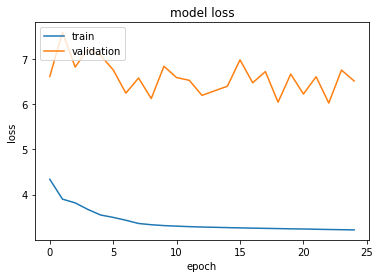

In [0]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

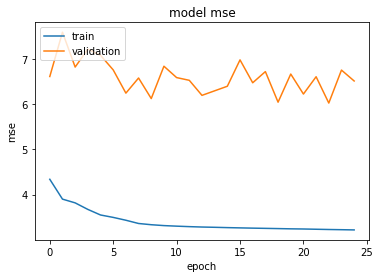

In [0]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()